In [1]:
from LoopStructural import GeologicalModel
from LoopStructural.visualisation import LavaVuModelViewer
from LoopStructural.datasets import load_laurent2016
import numpy as np
import pandas as pd
import glob
import os
import matplotlib.pyplot as plt
import logging
logging.getLogger().setLevel(logging.INFO)

/home/lgrose/anaconda3/envs/loop/lib/python3.8/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.decomposition.pca module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.decomposition. Anything that cannot be imported from sklearn.decomposition is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
# load in the data from the provided examples
data, bb = load_laurent2016()

In [3]:
data[data['type'] == 's2']

,X,Y,Z,nx,ny,nz,type,val
0,4823.496582,5576.529297,3652.300781,0.999869,0.008587,0.013755,s2,NaN
1,4509.626953,7308.625000,3793.699219,0.999753,-0.022182,0.001305,s2,NaN
2,6904.334473,6378.640625,3828.726563,0.999275,-0.036587,-0.010550,s2,NaN
3,8717.802734,5402.157227,4271.781250,0.998713,0.032723,-0.038755,s2,NaN
4,6485.542480,1681.788940,4266.632813,0.999788,0.019579,0.006339,s2,NaN
5,7817.476074,2067.795166,4299.859375,0.999597,-0.027851,0.005413,s2,NaN
6,2996.549805,3739.016357,3479.988281,0.999855,0.005633,0.016068,s2,NaN
7,2894.746094,3217.271973,3423.878906,0.999659,0.025509,0.005496,s2,NaN
8,2114.250000,2670.076172,3580.832031,0.998758,0.045024,-0.021359,s2,NaN
0,4723.504395,4748.135254,3588.621094,NaN,NaN,NaN,s2,0.0


In [4]:
rotation = [-69.11979675292969, 15.704944610595703, 6.00014591217041]

### Modelling S2

In [5]:
model = GeologicalModel(bb[0,:],bb[1,:])
model.set_model_data(data)
s2 = model.create_and_add_fold_frame('s2',
                                     nelements=10000, buffer=0.4)


/home/lgrose/anaconda3/envs/loop/lib/python3.8/site-packages/pyamg/krylov/_cg.py:140: UserWarning: 
Indefinite matrix detected in CG, aborting

  warn("\nIndefinite matrix detected in CG, aborting\n")
Add some more and try again.
Add some more and try again.


INFO:LoopStructural.visualisation.model_visualisation:Adding scalar field of s2_0 to viewer. Min: 3235.944865, max: 3241.340112



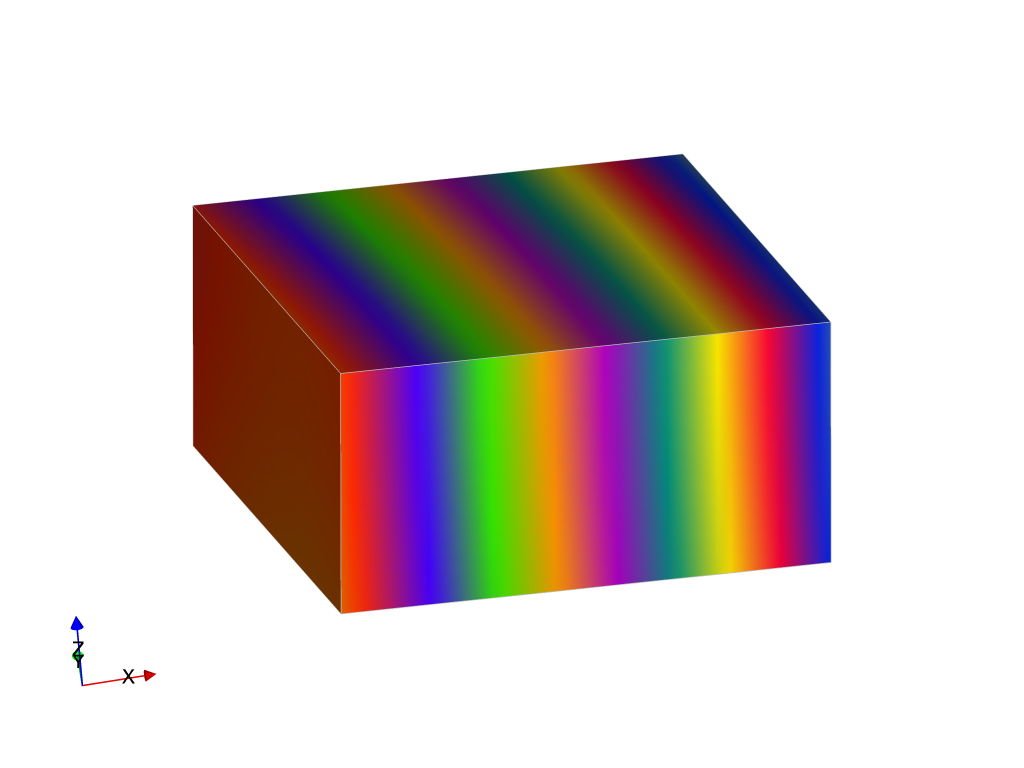

In [6]:
viewer = LavaVuModelViewer(model)
viewer.add_scalar_field(s2['feature'][0],
                       cmap='prism')
viewer.rotate(rotation)
viewer.display()

### Modelling S1

In [7]:
s1 = model.create_and_add_folded_fold_frame('s1',
                                            limb_wl=0.5, 
                                            av_fold_axis=True,
                                            nelements=50000,
                                            buffer=0.3
                                           )



INFO:LoopStructural.modelling.core.geological_model:Using last feature as fold frame
INFO:LoopStructural.modelling.features.geological_feature_builder:Adding 0 faults to s1_0
INFO:LoopStructural.modelling.core.geological_model:Guess: 0.000000 0.000000 0.000000 0.500000
INFO:LoopStructural.modelling.core.geological_model:There are 0 nans for the fold limb rotation angle and 104 observations
INFO:LoopStructural.modelling.core.geological_model:Fitted: 0.000000 0.000000 0.000000 0.500000
INFO:LoopStructural.modelling.features.structural_frame_builder:Building s1 coordinate 0
INFO:LoopStructural.modelling.features.geological_feature_builder:Adding fold to s1_0


cant fit


INFO:LoopStructural.interpolators.discrete_fold_interpolator:Adding fold orientation constraint to s1_0 w = 10.000000
INFO:LoopStructural.interpolators.discrete_fold_interpolator:Adding fold axis constraint to s1_0 w = 10.000000
INFO:LoopStructural.interpolators.discrete_fold_interpolator:Adding fold normalisation constraint to s1_0 w = 1.000000
INFO:LoopStructural.interpolators.discrete_fold_interpolator:Adding fold regularisation constraint to s1_0 w = 0.100000


(473200, 3, 4) (473200, 3) (473200, 4) (473200, 4)
473200


INFO:LoopStructural.interpolators.piecewiselinear_interpolator:Setting up PLI interpolator for s1_0
INFO:LoopStructural.interpolators.piecewiselinear_interpolator:Added 104 gradient constraints, 0 normal constraints,0 tangent constraints and 3 value constraintsto s1_0
INFO:LoopStructural.interpolators.discete_interpolator:Interpolation matrix is 2353419 x 101124
INFO:LoopStructural.interpolators.discete_interpolator:Solving with pyamg solve
Add some more and try again.
Add some more and try again.


INFO:LoopStructural.visualisation.model_visualisation:Adding scalar field of s1_0 to viewer. Min: -0.418491, max: 1.361740



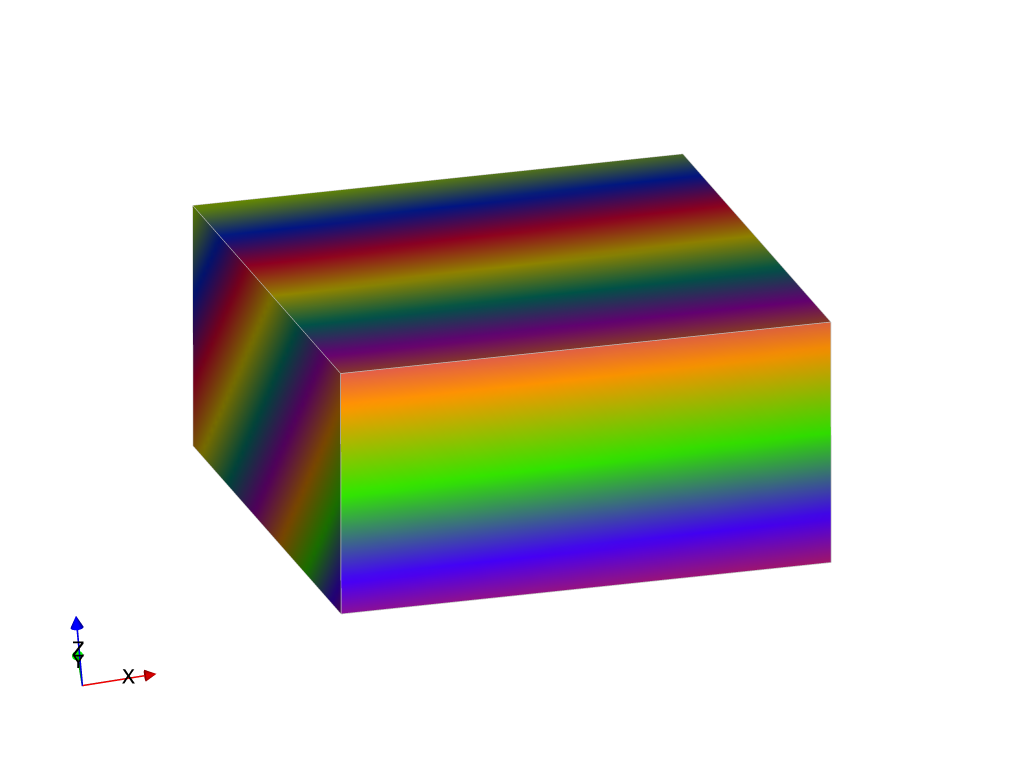

KeyError: 'limb_svariogram'

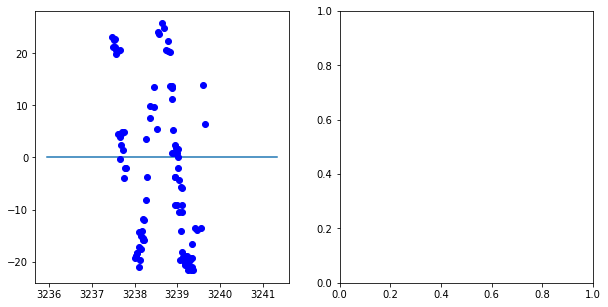

In [8]:
viewer = LavaVuModelViewer(model)
viewer.add_scalar_field(s1['feature'][0],
                       cmap='prism')
viewer.rotate([-69.11979675292969, 15.704944610595703, 6.00014591217041])
viewer.display()

fig, ax = plt.subplots(1,2,figsize=(10,5))
x = np.linspace(s2['feature'][0].min(),s2['feature'][0].max(),1000)
ax[0].plot(x,s1['fold'].fold_limb_rotation(x))
ax[0].plot(s1['foliation'],s1['limb_rotation'],'bo')
ax[1].plot(s1['limb_svariogram'].lags,s1['limb_svariogram'].variogram,'bo')

### Modelling S0

In [ ]:
s0 = model.create_and_add_folded_fold_frame('s0',
                                            limb_wl=1., 
                                            av_fold_axis=True,
                                            nelements=50000,
                                            buffer=0.2
                                           )

In [ ]:
viewer = LavaVuModelViewer(model)
viewer.add_scalar_field(s0['feature'][0],
                       cmap='tab20')
viewer.rotate([-69.11979675292969, 15.704944610595703, 6.00014591217041])
viewer.display()

fig, ax = plt.subplots(1,2,figsize=(10,5))
x = np.linspace(s1['feature'][0].min(),s1['feature'][0].max(),1000)
ax[0].plot(x,s0['fold'].fold_limb_rotation(x))
ax[0].plot(s0['foliation'],s0['limb_rotation'],'bo')
# ax[1].plot(s0['limb_svariogram'].lags,s1['limb_svariogram'].variogram,'bo')